# Comparison

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iclingo import Clingo, Model
import funcs
from funcs import BMDataFormat, AccumulatedStats
import matplotlib.pyplot as plt
import numpy as np
import os
import files
import glob
import json

In [3]:
from merger import Merger
# initialize merger
merger = Merger("../encodings/sequential", "../benchmark_data")
def merge(benchmark_id):
        benchmark = benchmarks[benchmark_id-1]
        return merger.merge(benchmark, vizualize=False, save_data=False, deterministic_waiter=True, check_validity=True, automated=False)
        
def mergeAll(exclude=[22,23,26]):
    for i in range(len(benchmarks)):
        benchmark_id = i+1
        benchmark = benchmarks[i]
        if benchmark_id in exclude:
            continue
        print("################## {} ###################".format(benchmark))
        merger.merge(benchmark, vizualize=False, save_data=True, automated=False, deterministic_waiter=True, check_validity=True)

In [30]:
n = 20
group1 = np.random.rand(n)
group2 = np.random.rand(n)
group3 = np.random.rand(n)
group4 = np.random.rand(n)

index = ['BM{}'.format(i) for i in range(n)]
df = pd.DataFrame({'group1': group1,
                   'group2': group2,
                   'group3': group3,
                   'group4': group4,},index=index)
df

,group1,group2,group3,group4
BM0,0.733224,0.263480,0.626849,0.050003
BM1,0.899429,0.665917,0.476983,0.045927
BM2,0.987841,0.265425,0.883945,0.134745
BM3,0.642131,0.400382,0.612429,0.383260
BM4,0.991419,0.062013,0.027114,0.119622
BM5,0.124193,0.403176,0.530367,0.604107
BM6,0.374554,0.134870,0.025234,0.062282
BM7,0.548464,0.913747,0.899658,0.532716
BM8,0.803962,0.300049,0.428910,0.693649
BM9,0.598882,0.511600,0.630402,0.756388


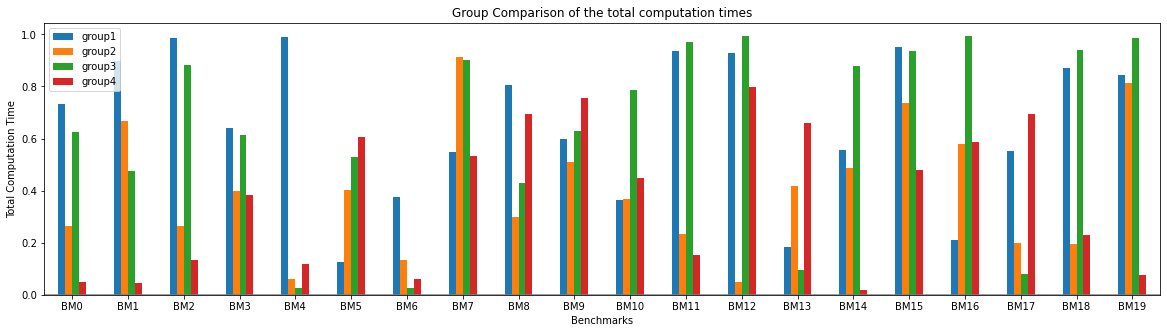

In [38]:
ax = df.plot.bar(rot=0,figsize=(20,5))
ax.axhline(y=0, color='gray', linestyle='-')
ax.set_title('Group Comparison of the total computation times')
ax.set_xlabel("Benchmarks")
ax.set_ylabel("Total Computation Time")
fig = ax.get_figure()
fig.savefig('../figures/group_comparison.png')

In [2]:
#create a data frame
benchmarks = funcs.getAllBenchmarks('../benchmarks')
cols = ['total','ground','solve']
rows = ['BM{}'.format(i+1) for i, bm in enumerate(benchmarks)]
dct = {}
for c in cols:
    dct[c] = [0.0]*len(rows)
df = pd.DataFrame(dct, index=rows)

In [3]:
# reading json benchmark data
def readJSONs(path):
    files = glob.glob(path)
    bmdfs = []
    for file in files:
        bmdfs.append(BMDataFormat())
        bmdfs[-1].load(file)
    return bmdfs
bmdfs = readJSONs("../benchmark_data/*det*/*.json")

In [ ]:
# insert benchmark data into data frame
for bmdf in bmdfs:
    df.loc[df.index[int(bmdf.data['instance'][0:2])-1]] = [
                  bmdf.data['statistics']['total'],
                  bmdf.data['statistics']['groundingTime'],
                  bmdf.data['statistics']['solvingTime']
                 ]
#df.to_csv('../benchmark_data/det_approach/det_approach.csv')
df